<center><h2>Build a multiple linear regression model for the prediction of demand for shared bikes</h2></center>


## **Problem Statement** 

##### A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

###### A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


###### In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


###### They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

###### Which variables are significant in predicting the demand for shared bikes.
###### How well those variables describe the bike demands


In [1]:
import numpy as np
import pandas as pd


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [7]:
import statsmodels.api as sm

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [9]:
from sklearn.metrics import r2_score

### Step 1: Reading and carrying out Data Inspection


In [10]:
#reading the bikeshare dataset
bike = pd.read_csv("day.csv")

In [11]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Inspect the various aspects of the housing dataframe


In [12]:
bike.shape

(730, 16)

In [13]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [14]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Duplicates check

In [15]:
bike.shape,bike.drop_duplicates().shape

((730, 16), (730, 16))

### Data Inspection observation:-
  - Bike Dataset have 730 rows and 16 columns in it.
  - No null values in the given dataset.
  - No duplicates observed in given dataset.t.


### Step 2: Dropping Unnecessary Columns
- Dropping column Instant since it is just a row identifier and does not have any role in model building.
- Dropping column 'dteday' since it is just a row identifier and does not have any role in model building.
- Dropping columns 'count' & 'registered' since it is alredy included in target variable 'cnt'

In [16]:
bike.drop(['instant','dteday','casual','registered'],axis = 1, inplace = True)

In [17]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Step 3  - Value Mapping
- Observed in the data set that some of the variables like "weathersit" and "season" contains numeric values
- But in order to fit a regression line, we would need to create dummy variables and for that these variables need to be converted to string



In [18]:
#mapping values of season from data dictionary
bike[['season']] = bike[['season']].apply(lambda x : x.map({1:'spring',2:'summer',3:'fall',4:'winter'}))

In [19]:
#mapping values of mnth from data dictionary
bike[['mnth']] = bike[['mnth']].apply(lambda x : x.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug'
                                                        ,9:'sep',10:'oct',11:'nov',12:'dec'}))

In [20]:
#mapping values of weekday from data dictionary
bike[['weekday']] = bike[['weekday']].apply(lambda x : x.map({1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat',0:'sun'}))

In [21]:
#mapping values of weathersit from data dictionary
bike[['weathersit']] = bike[['weathersit']].apply(lambda x : x.map({1:'clear',2:'mist & cloudy',3:'light snow & rain'
                                                                    ,4:'heavy rain & ice pallets',}))

In [22]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist & cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist & cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


## Step 4: Visualising the Data


### Understanding the data :-
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where we will also identify if some predictors directly have a strong association with the outcome variable


#### We'll visualise our data using matplotlib and seaborn.

## Visualising Numeric Variables#### Let's make a scatterplot of all the numeric variables w.r.t to Target Variable





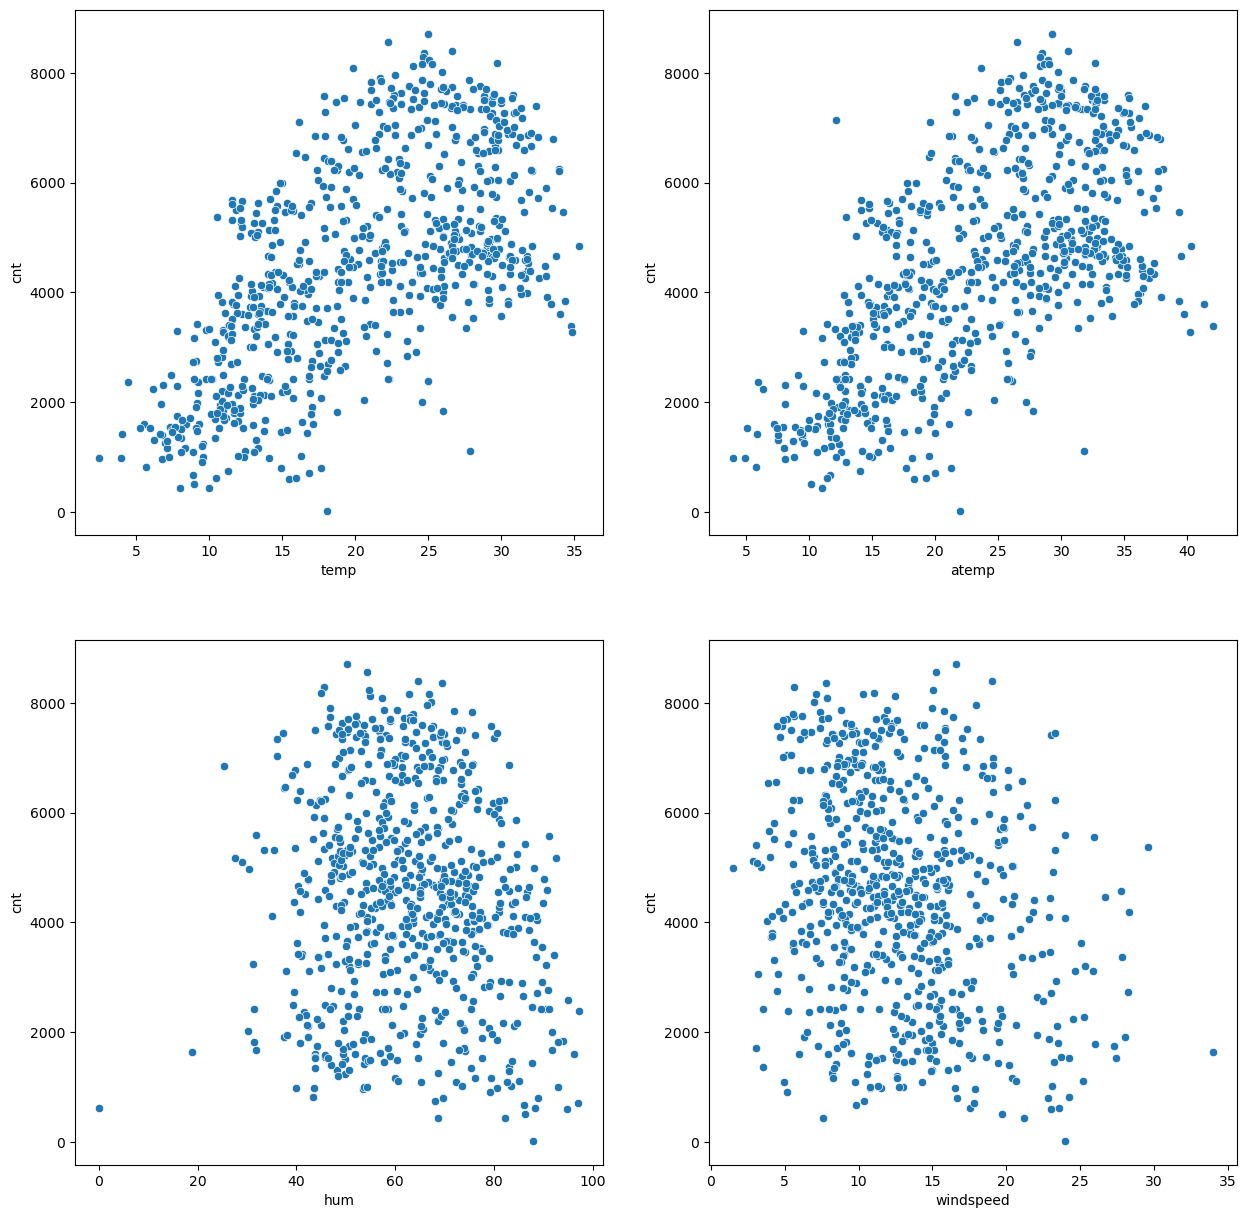

In [23]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.scatterplot(x = 'temp', y = 'cnt', data = bike)
plt.subplot(2,2,2)
sns.scatterplot(x = 'atemp', y = 'cnt', data = bike)
plt.subplot(2,2,3)
sns.scatterplot(x = 'hum', y = 'cnt', data = bike)
plt.subplot(2,2,4)
sns.scatterplot(x = 'windspeed', y = 'cnt', data = bike)
plt.show()

### Insights on Target Variable vs Numeric Variables:-
- Target Variable Cnt is postively correlated with temp variable.
- Target Variable Cnt is postively correlated with atemp variable.
- Target Variable Cnt is negatively correlated with windspeed variable.



### Visualising Categorical Variables

- As we might have noticed, there are a few categorical variables as well. Let's make a boxplot of these variables w.r.t to Target Variable

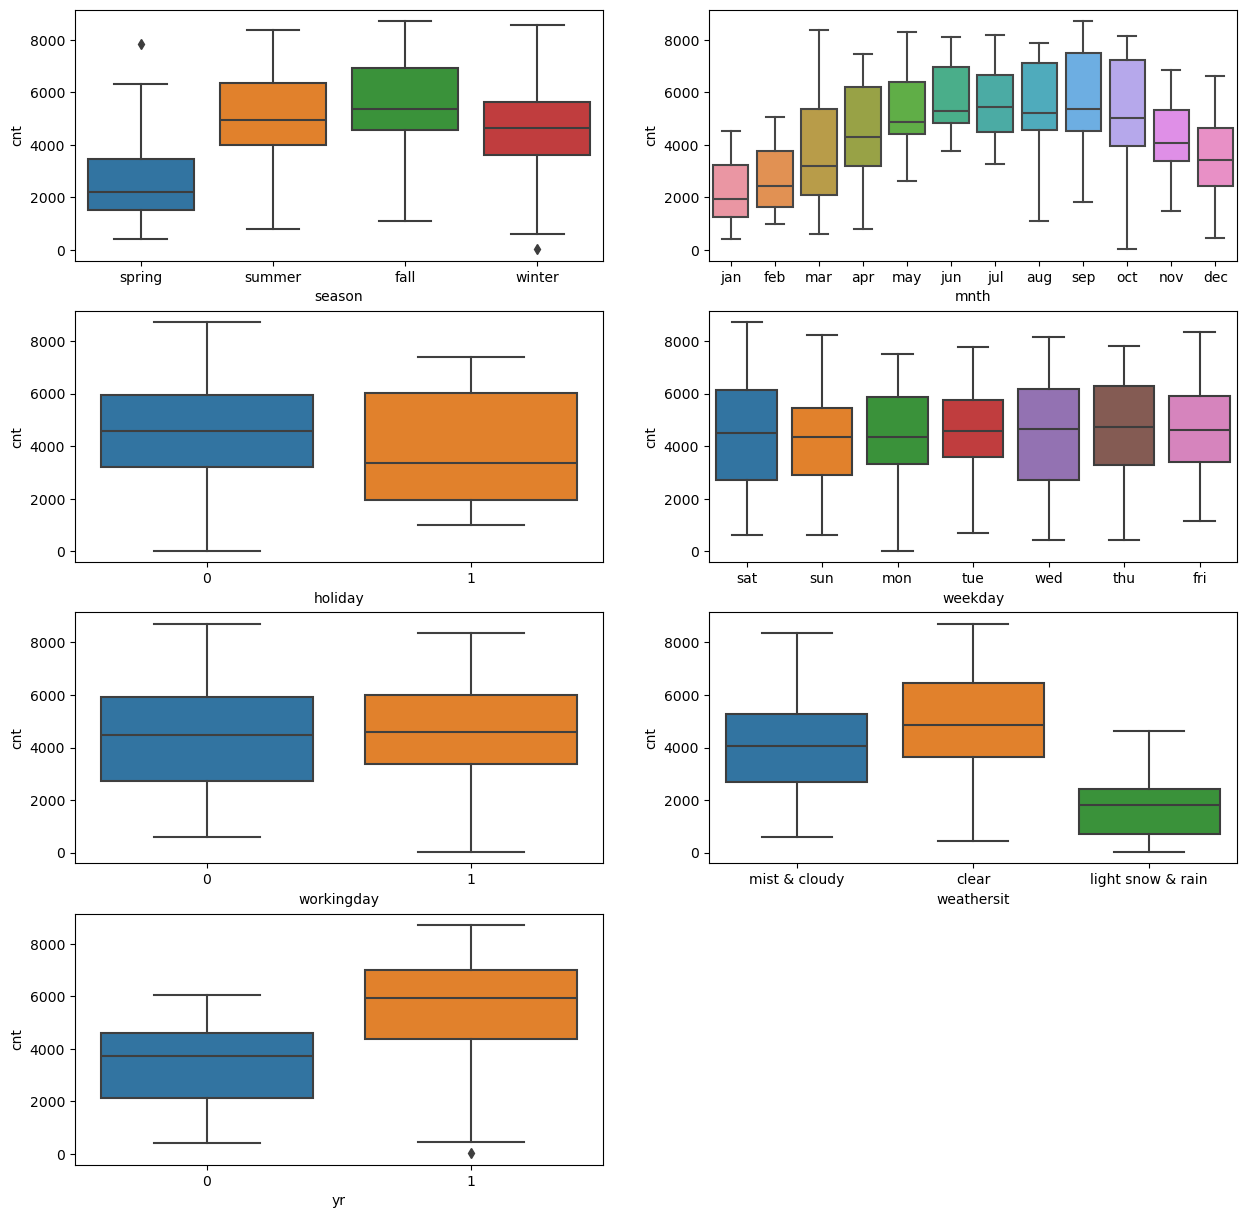

In [24]:
plt.figure(figsize=(15, 15))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(4,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(4,2,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(4,2,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(4,2,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(4,2,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(4,2,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.show()

### Insights on Target Variable vs Categorical Variables:-
- There is significant drop in target variable in spring season.
- Majority of bikes are rented in fall season.- There is increasing trend in bikes rented in the month of January to September with dip in month of November & December.
- Majority of bikes are rented in the month of June to September.
- Majority of bikes are rented when there is no holiday.
- There is pretty slight variation in bikes getting rented among days.
- Bikes are rented more when there is clear weather with few clouds or partly cloudy.
- Bikes are rented when there are light snow and rain with scattered clouds.
- Bikes are not rented when there is heavy rain accompanied by thunderstorms and falling of ice pallets.
- Bikes are rented more in year 2019 compared to 2018






### Visualising Correlation among Variables
- Checking Correlation among variables to discover multicollinearity




In [25]:
bike_numeric = bike.select_dtypes(include=[np.number])

In [26]:
#bike.info()

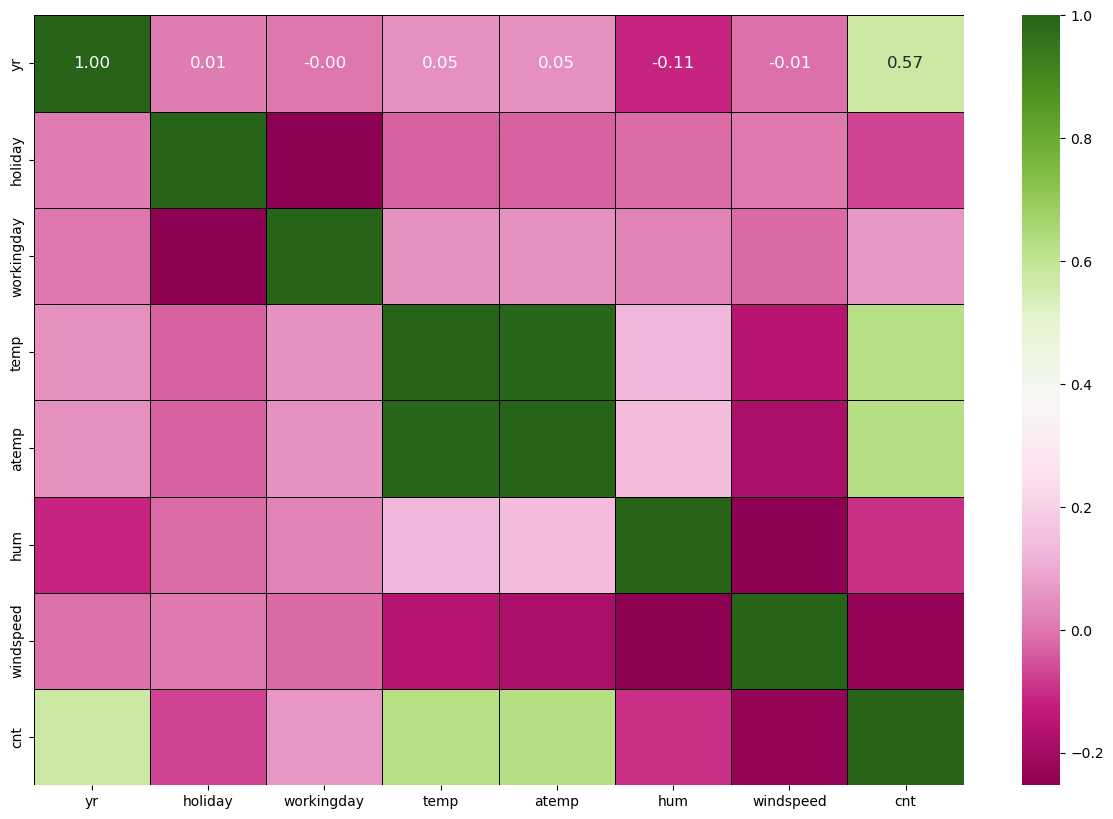

In [27]:
# Let's check the Correlation
plt.figure(figsize = (15,10))
sns.heatmap(bike_numeric.corr(), annot=True,annot_kws={"size": 12},fmt='.2f', linewidth=.5,cmap="PiYG", linecolor='black');
plt.show()

### Insights on Correlation:-


- Target Variable is highly positively correlated with predictor variable 'temp' , 'atemp' and 'yr'
- Target Variable is negatively correlated with predictor variable 'windspeed'
- Predictor Variable 'temp' and 'atemp' are highly correlated with each other which shows the case of multicollinearity.


In [28]:
#Since we observed that temp and atemp are highly correlated which is not desirable hence dropping variable atemp.
bike.drop(['atemp'],axis = 1, inplace = True)

### Step 5: Data Preparation
#### Dummy Variables- The variables season , mnth , weekday , weathersit has multiple levels. We need to convert these levels into integer as well.
###### For this, we will use something called dummy variables.




In [29]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season_dummy'
season_dummy = pd.get_dummies(bike['season'], dtype=np.uint8)

In [30]:
season_dummy.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


#### Now, we don't need three columns. We can drop the fall column, as the type of season can be identified with just the last three columns where —



- 000 will correspond to fall
- 100 will correspond to spring
- 010 will correspond to summer
- 001 will correspond to winter



In [31]:
# Let's drop the first column from season_dummy df using 'drop_first = True'
season_dummy = pd.get_dummies(bike['season'], drop_first = True , dtype=np.uint8)

In [32]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'mnth_dummy' and dropping 1st column.
mnth_dummy = pd.get_dummies(bike['mnth'], drop_first = True, dtype=np.uint8)

In [33]:
# Check what the dataset 'mnth_dummy' looks like
mnth_dummy.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [34]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'weekday_dummy' and dropping 1st column.
weekday_dummy = pd.get_dummies(bike['weekday'], drop_first = True, dtype=np.uint8)

In [35]:
# Check what the dataset 'weekday_dummy' looks like
weekday_dummy.head()

,mon,sat,sun,thu,tue,wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [36]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weathersit_dummy' and dropping 1st column.
weathersit_dummy = pd.get_dummies(bike['weathersit'], drop_first = True, dtype=np.uint8)

In [37]:
# Check what the dataset 'weathersit_dummy' looks like
weathersit_dummy.head()

,light snow & rain,mist & cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [38]:
# Add the dummy variables datasets to the original bike dataframe
bike = pd.concat([bike, season_dummy, mnth_dummy, weekday_dummy, weathersit_dummy ], axis = 1)

In [39]:
# Now let's see the head of our dataframe.
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,light snow & rain,mist & cloudy
0,spring,0,jan,0,sat,0,mist & cloudy,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,spring,0,jan,0,sun,0,mist & cloudy,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,spring,0,jan,0,mon,1,clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,tue,1,clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,spring,0,jan,0,wed,1,clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [40]:
# Drop 'season' , 'mnth' , 'weekday' , 'weathersit' as we have created the dummies for it
bike.drop(['season' , 'mnth' , 'weekday' , 'weathersit'], axis = 1, inplace = True)

In [41]:
# Checking the head of dataset again
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,light snow & rain,mist & cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


#### Step 6: Splitting the Data into Training and Testing Sets
- the first basic step for regression is performing a train-test split.



In [42]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
# We have considered 80 20 ratio of Train vs Test
bike_train, bike_test = train_test_split(bike, train_size = 0.8, test_size = 0.2, random_state = 100)

### Rescaling the Features


##### It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As we know, there are two common ways of rescaling:



- Min-Max scaling
- Standardisation (mean-0, sigma-1)


##### This time, we will use MinMax scaling.



In [43]:
scaler = MinMaxScaler()

In [44]:
# Apply scaler() to all the numeric columns except the 'binary' and 'dummy' variables
bike_vars = ['temp', 'hum', 'windspeed', 'cnt']
bike_train[bike_vars] = scaler.fit_transform(bike_train[bike_vars])

In [45]:
bike_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,light snow & rain,mist & cloudy
367,1,0,1,0.113228,0.454701,0.695175,0.254717,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
648,1,0,1,0.468352,0.477458,0.299450,0.868385,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
44,0,0,1,0.443431,0.387290,0.807474,0.217556,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
705,1,0,1,0.326094,0.787463,0.189819,0.573631,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
379,1,0,0,0.133996,0.431945,0.449210,0.263346,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [46]:
bike_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,light snow & rain,mist & cloudy
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513699,0.027397,0.667808,0.537414,0.649499,0.319463,0.515792,0.251712,0.246575,0.250000,0.090753,0.087329,0.073630,0.087329,0.075342,0.077055,0.090753,0.087329,0.080479,0.092466,0.080479,0.148973,0.150685,0.154110,0.135274,0.133562,0.154110,0.027397,0.342466
std,0.500241,0.163378,0.471403,0.225336,0.144219,0.168114,0.225336,0.434369,0.431387,0.433384,0.287504,0.282558,0.261392,0.282558,0.264169,0.266907,0.287504,0.282558,0.272267,0.289931,0.272267,0.356367,0.358048,0.361363,0.342309,0.340472,0.361363,0.163378,0.474941
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.340113,0.535852,0.199177,0.350696,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545191,0.653714,0.294764,0.522837,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.736512,0.752361,0.410413,0.691872,1.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building


In [47]:
y_train = bike_train.pop('cnt')
X_train = bike_train

### Step 7: Building a linear model

##### This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)



### RFE(Recursive feature elimination)

In [48]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [49]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 3),
 ('winter', True, 1),
 ('aug', False, 9),
 ('dec', True, 1),
 ('feb', False, 4),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 11),
 ('mar', False, 14),
 ('may', False, 8),
 ('nov', True, 1),
 ('oct', False, 10),
 ('sep', False, 2),
 ('mon', False, 6),
 ('sat', True, 1),
 ('sun', False, 5),
 ('thu', False, 12),
 ('tue', False, 7),
 ('wed', False, 13),
 ('light snow & rain', True, 1),
 ('mist & cloudy', True, 1)]

In [50]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'winter', 'dec', 'jan', 'jul', 'nov', 'sat', 'light snow & rain',
       'mist & cloudy'],
      dtype='object')

In [51]:
X_train.columns[~rfe.support_]

Index(['summer', 'aug', 'feb', 'jun', 'mar', 'may', 'oct', 'sep', 'mon', 'sun',
       'thu', 'tue', 'wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics


#### Model 1

In [52]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [53]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_rfe)

In [54]:
# Build a 1st fitted model
lr_1 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [55]:
#Let's see the summary of our linear model
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     216.6
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          2.02e-223
Time:                        22:16:48   Log-Likelihood:                 598.33
No. Observations:                 584   AIC:                            -1165.
Df Residuals:                     568   BIC:                            -1095.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3155      0.031     10.212      0.000       0.255       0.376
yr                    0.2289      0.007     30.876      0.000       0.214       0.243
holiday              -0.0436      0.024     -1.806      0.071      -0.091       0.004
workingday            0.0510      0.010      4.920      0.000       0.031       0.071
temp                  0.4458      0.031     14.594      0.000       0.386       0.506
hum                  -0.1295      0.035     -3.671      0.000      -0.199      -0.060
windspeed            -0.1838      0.024     -7.763      0.000      -0.230      -0.137
spring               -0.1105      0.014     -7.800      0.000      -0.138      -0.083
winter                0.0817      0.012      6.557      0.000       0.057       0.106
dec                  -0.0604      0.015     -3.937      0.000      -0.091      -0.030
jan                  -0.0500      0.016     -3.056      0.002      -0.082      -0.018
jul                  -0.0787      0.016     -5.030      0.000      -0.109      -0.048
nov                  -0.0688      0.017     -4.041      0.000      -0.102      -0.035
sat                   0.0613      0.013      4.618      0.000       0.035       0.087
light snow & rain    -0.2634      0.025    -10.534      0.000      -0.313      -0.214
mist & cloudy        -0.0597      0.010     -6.135      0.000      -0.079      -0.041
==============================================================================
Omnibus:                       96.561   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              283.184
Skew:                          -0.797   Prob(JB):                     3.22e-62
Kurtosis:                       6.017   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF
#### Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model.




In [56]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,25.87
3,temp,18.12
2,workingday,5.01
5,windspeed,4.25
6,spring,3.06
7,winter,2.77
14,mist & cloudy,2.29
0,yr,2.08
12,sat,1.90
9,jan,1.71


### Dropping the variable and updating the model


##### As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, holiday as it has a very high p-value of 0.071. Let's go ahead and drop this variable.



In [57]:
# Dropping varaible with very high p-value
X_train_rfe = X_train_rfe.drop('holiday', axis=1)

### Model 2

In [58]:
# Build a 2nd fitted model
X_train_lm = sm.add_constant(X_train_rfe)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
lr_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     230.9
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          6.59e-224
Time:                        22:16:56   Log-Likelihood:                 596.66
No. Observations:                 584   AIC:                            -1163.
Df Residuals:                     569   BIC:                            -1098.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3110      0.031     10.079      0.000       0.250       0.372
yr                    0.2287      0.007     30.792      0.000       0.214       0.243
workingday            0.0574      0.010      5.889      0.000       0.038       0.077
temp                  0.4430      0.031     14.493      0.000       0.383       0.503
hum                  -0.1283      0.035     -3.629      0.000      -0.198      -0.059
windspeed            -0.1847      0.024     -7.787      0.000      -0.231      -0.138
spring               -0.1120      0.014     -7.898      0.000      -0.140      -0.084
winter                0.0817      0.012      6.548      0.000       0.057       0.106
dec                  -0.0620      0.015     -4.037      0.000      -0.092      -0.032
jan                  -0.0513      0.016     -3.139      0.002      -0.083      -0.019
jul                  -0.0783      0.016     -4.996      0.000      -0.109      -0.048
nov                  -0.0722      0.017     -4.254      0.000      -0.106      -0.039
sat                   0.0678      0.013      5.290      0.000       0.043       0.093
light snow & rain    -0.2634      0.025    -10.513      0.000      -0.313      -0.214
mist & cloudy        -0.0598      0.010     -6.132      0.000      -0.079      -0.041
==============================================================================
Omnibus:                      100.725   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              301.825
Skew:                          -0.823   Prob(JB):                     2.88e-66
Kurtosis:                       6.113   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.83
2,temp,17.92
1,workingday,4.44
4,windspeed,4.23
5,spring,3.03
6,winter,2.77
13,mist & cloudy,2.29
0,yr,2.08
11,sat,1.77
8,jan,1.71


### Dropping the variable and updating the model


### As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, Jan as it has a very high p-value of 0.002. Let's go ahead and drop this variable.


In [60]:
# Dropping varaible with very high p-value
X_train_rfe = X_train_rfe.drop('jan', axis=1)

### Module 3

In [61]:
# Build a third fitted model
X_train_lm = sm.add_constant(X_train_rfe)
lr_3 = sm.OLS(y_train, X_train_lm).fit()
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     244.1
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          5.36e-223
Time:                        22:17:01   Log-Likelihood:                 591.65
No. Observations:                 584   AIC:                            -1155.
Df Residuals:                     570   BIC:                            -1094.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2953      0.031      9.624      0.000       0.235       0.356
yr                    0.2276      0.007     30.441      0.000       0.213       0.242
workingday            0.0572      0.010      5.826      0.000       0.038       0.077
temp                  0.4717      0.029     16.047      0.000       0.414       0.529
hum                  -0.1363      0.036     -3.838      0.000      -0.206      -0.067
windspeed            -0.1781      0.024     -7.481      0.000      -0.225      -0.131
spring               -0.1214      0.014     -8.695      0.000      -0.149      -0.094
winter                0.0834      0.013      6.635      0.000       0.059       0.108
dec                  -0.0497      0.015     -3.322      0.001      -0.079      -0.020
jul                  -0.0836      0.016     -5.325      0.000      -0.114      -0.053
nov                  -0.0660      0.017     -3.889      0.000      -0.099      -0.033
sat                   0.0674      0.013      5.219      0.000       0.042       0.093
light snow & rain    -0.2576      0.025    -10.230      0.000      -0.307      -0.208
mist & cloudy        -0.0589      0.010     -6.000      0.000      -0.078      -0.040
==============================================================================
Omnibus:                       93.436   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              272.859
Skew:                          -0.772   Prob(JB):                     5.62e-60
Kurtosis:                       5.971   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,24.57
2,temp,16.75
1,workingday,4.43
4,windspeed,4.23
6,winter,2.77
5,spring,2.71
12,mist & cloudy,2.28
0,yr,2.07
10,sat,1.77
9,nov,1.67


#### Dropping the variable and updating the model
##### As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, dec as it has a very high p-value of 0.001. Let's go ahead and drop this variable.




In [63]:
# Dropping varaible with high p-value
X_train_rfe = X_train_rfe.drop('dec', axis=1)

### Model 4

In [64]:
# Build a 4th fitted model
X_train_lm = sm.add_constant(X_train_rfe)
lr_4 = sm.OLS(y_train, X_train_lm).fit()
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     259.0
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          7.55e-222
Time:                        22:17:07   Log-Likelihood:                 586.05
No. Observations:                 584   AIC:                            -1146.
Df Residuals:                     571   BIC:                            -1089.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2842      0.031      9.238      0.000       0.224       0.345
yr                    0.2269      0.008     30.095      0.000       0.212       0.242
workingday            0.0569      0.010      5.743      0.000       0.037       0.076
temp                  0.4959      0.029     17.266      0.000       0.440       0.552
hum                  -0.1462      0.036     -4.093      0.000      -0.216      -0.076
windspeed            -0.1745      0.024     -7.276      0.000      -0.222      -0.127
spring               -0.1191      0.014     -8.470      0.000      -0.147      -0.092
winter                0.0717      0.012      5.892      0.000       0.048       0.096
jul                  -0.0879      0.016     -5.573      0.000      -0.119      -0.057
nov                  -0.0477      0.016     -2.946      0.003      -0.080      -0.016
sat                   0.0665      0.013      5.107      0.000       0.041       0.092
light snow & rain    -0.2532      0.025     -9.982      0.000      -0.303      -0.203
mist & cloudy        -0.0566      0.010     -5.728      0.000      -0.076      -0.037
==============================================================================
Omnibus:                       82.214   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.593
Skew:                          -0.714   Prob(JB):                     1.53e-47
Kurtosis:                       5.611   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,23.60
2,temp,15.91
1,workingday,4.43
4,windspeed,4.23
5,spring,2.71
6,winter,2.50
11,mist & cloudy,2.25
0,yr,2.06
9,sat,1.76
8,nov,1.51


#### Dropping the variable and updating the model

##### As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, hum as it has a very high VIF of 23.60. Let's go ahead and drop this variable.

In [66]:
# Dropping varaible with high VIF
X_train_rfe = X_train_rfe.drop('hum', axis=1)

### Model 5

In [67]:
# Build a 5th fitted model
X_train_lm = sm.add_constant(X_train_rfe)
lr_5 = sm.OLS(y_train, X_train_lm).fit()
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     273.4
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.67e-219
Time:                        22:17:15   Log-Likelihood:                 577.61
No. Observations:                 584   AIC:                            -1131.
Df Residuals:                     572   BIC:                            -1079.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2023      0.024      8.542      0.000       0.156       0.249
yr                    0.2310      0.008     30.503      0.000       0.216       0.246
workingday            0.0586      0.010      5.837      0.000       0.039       0.078
temp                  0.4694      0.028     16.548      0.000       0.414       0.525
windspeed            -0.1463      0.023     -6.283      0.000      -0.192      -0.101
spring               -0.1219      0.014     -8.562      0.000      -0.150      -0.094
winter                0.0631      0.012      5.195      0.000       0.039       0.087
jul                  -0.0808      0.016     -5.081      0.000      -0.112      -0.050
nov                  -0.0452      0.016     -2.756      0.006      -0.077      -0.013
sat                   0.0694      0.013      5.265      0.000       0.043       0.095
light snow & rain    -0.2947      0.024    -12.499      0.000      -0.341      -0.248
mist & cloudy        -0.0803      0.008     -9.902      0.000      -0.096      -0.064
==============================================================================
Omnibus:                       83.091   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.897
Skew:                          -0.722   Prob(JB):                     4.83e-48
Kurtosis:                       5.621   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.03
1,workingday,4.29
3,windspeed,4.23
0,yr,2.06
5,winter,1.94
4,spring,1.84
8,sat,1.74
10,mist & cloudy,1.54
7,nov,1.50
6,jul,1.32


#### Dropping the variable and updating the model
##### As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, windspeed as it has a high temp of 6.03. Let's go ahead and drop this variable.

In [69]:
# Dropping varaible with high p-value
X_train_rfe = X_train_rfe.drop('temp', axis=1)


###  Model 6

In [70]:
# Build a 6th fitted model
X_train_lm = sm.add_constant(X_train_rfe)
lr_6 = sm.OLS(y_train, X_train_lm).fit()
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     185.2
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          3.04e-172
Time:                        22:17:22   Log-Likelihood:                 463.38
No. Observations:                 584   AIC:                            -904.8
Df Residuals:                     573   BIC:                            -856.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5271      0.016     32.763      0.000       0.495       0.559
yr                    0.2410      0.009     26.275      0.000       0.223       0.259
workingday            0.0627      0.012      5.143      0.000       0.039       0.087
windspeed            -0.1882      0.028     -6.692      0.000      -0.243      -0.133
spring               -0.2962      0.012    -25.411      0.000      -0.319      -0.273
winter               -0.0247      0.013     -1.862      0.063      -0.051       0.001
jul                   0.0042      0.018      0.230      0.818      -0.032       0.040
nov                  -0.0887      0.020     -4.504      0.000      -0.127      -0.050
sat                   0.0698      0.016      4.363      0.000       0.038       0.101
light snow & rain    -0.3096      0.029    -10.817      0.000      -0.366      -0.253
mist & cloudy        -0.0914      0.010     -9.303      0.000      -0.111      -0.072
==============================================================================
Omnibus:                       48.565   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.554
Skew:                          -0.539   Prob(JB):                     9.72e-20
Kurtosis:                       4.561   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.48
1,workingday,3.07
4,winter,1.94
0,yr,1.89
3,spring,1.55
9,mist & cloudy,1.51
7,sat,1.50
6,nov,1.49
5,jul,1.13
8,light snow & rain,1.07


### Now as we can see, the p-values is high - dropping jul(P- value =0.818)

In [72]:
# Dropping varaible with high p-value
X_train_rfe = X_train_rfe.drop('jul', axis=1)

### Model 7

In [73]:
# Build a 6th fitted model
X_train_lm = sm.add_constant(X_train_rfe)
lr_6 = sm.OLS(y_train, X_train_lm).fit()
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     206.1
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          2.11e-173
Time:                        22:17:31   Log-Likelihood:                 463.35
No. Observations:                 584   AIC:                            -906.7
Df Residuals:                     574   BIC:                            -863.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5280      0.016     33.914      0.000       0.497       0.559
yr                    0.2410      0.009     26.302      0.000       0.223       0.259
workingday            0.0626      0.012      5.143      0.000       0.039       0.087
windspeed            -0.1887      0.028     -6.734      0.000      -0.244      -0.134
spring               -0.2968      0.011    -26.151      0.000      -0.319      -0.274
winter               -0.0254      0.013     -1.954      0.051      -0.051       0.000
nov                  -0.0887      0.020     -4.508      0.000      -0.127      -0.050
sat                   0.0698      0.016      4.365      0.000       0.038       0.101
light snow & rain    -0.3096      0.029    -10.825      0.000      -0.366      -0.253
mist & cloudy        -0.0917      0.010     -9.408      0.000      -0.111      -0.073
==============================================================================
Omnibus:                       48.686   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.864
Skew:                          -0.540   Prob(JB):                     8.33e-20
Kurtosis:                       4.564   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.47
1,workingday,3.00
4,winter,1.90
0,yr,1.88
8,mist & cloudy,1.51
3,spring,1.50
5,nov,1.49
6,sat,1.48
7,light snow & rain,1.07


### Now as you can see, the p-values and VIF both are within an acceptable range. So we go ahead and make our predictions using this model only.

### Step 8: Residual Analysis of the train data

##### So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.



In [75]:
y_train_pred = lr_6.predict(X_train_lm)

C:\Users\admin\AppData\Local\Temp\ipykernel_12480\2869572052.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_pred), bins = 20)
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Errors')

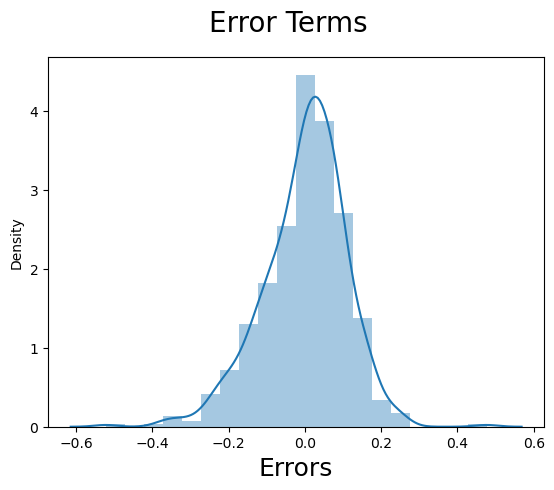

In [76]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Step 9: Making Predictions Using the Final Model

#### Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fifth model.

In [77]:
# Apply scaler() to all the numeric columns except the 'binary' and 'dummy' variables
bike_vars = ['temp', 'hum', 'windspeed', 'cnt']
bike_test[bike_vars] = scaler.transform(bike_test[bike_vars])
bike_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,light snow & rain,mist & cloudy
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.445205,0.034247,0.746575,0.569603,0.635933,0.315127,0.517368,0.226027,0.273973,0.219178,0.061644,0.075342,0.089041,0.075342,0.123288,0.102740,0.061644,0.075342,0.089041,0.054795,0.089041,0.123288,0.116438,0.102740,0.171233,0.178082,0.089041,0.034247,0.315068
std,0.498699,0.182488,0.436469,0.238088,0.156357,0.161524,0.212757,0.419697,0.447530,0.415114,0.241335,0.264852,0.285783,0.264852,0.329899,0.304664,0.241335,0.264852,0.285783,0.228362,0.285783,0.329899,0.321854,0.304664,0.378009,0.383899,0.285783,0.182488,0.466142
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.055683,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.250000,0.359075,0.534457,0.196160,0.391251,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.560248,0.614856,0.306383,0.508916,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.801929,0.730570,0.411976,0.649994,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.800793,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test


In [78]:
y_test = bike_test.pop('cnt')
X_test = bike_test
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
# Making predictions
y_test_pred = lr_6.predict(X_test_new)

## Step 10: Model Evaluation

#### Let's Find out the R-Square of Final Model on Train Dataset and Test Dataset respectively

In [79]:
print('The R-Square of Final Model on Train Dataset is:- ',round(r2_score(y_train,y_train_pred),4))
print('The R-Square of Final Model on Test Dataset is:-  ',round(r2_score(y_test,y_test_pred),4))

The R-Square of Final Model on Train Dataset is:-  0.7637
The R-Square of Final Model on Test Dataset is:-   0.7319


Text(0, 0.5, 'y_test_pred')

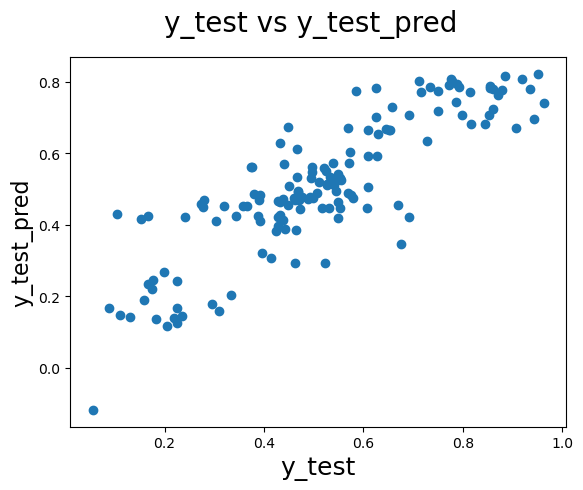

In [80]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)      

#### We can see that the equation of our best fitted line is:

### 0.528 +  0.241 * yr  + 0.0626 * workingday -0.1887 * windspeed -0.2968 * spring -0.0254 * winter -0.0887 * nov + 0.0698 * sat -0.3096 * light snow & rain -0.0917 * mist & cloudy


# Conclusion
### As per our final Model, the top 3 predictor variables that influences the bike booking are:

## sat :- A coefficient value of 0.0698 indicates that a unit increase in temp variable increases the bike hire numbers by 0.0698 units.
## yr:- A coefficient value of 0.241 indicates that a unit increase in yr variable increases the bike hire numbers by 0.241 units.
## light snow & rain:- A coefficient value of -0.3096 indicates, a unit increase variable decreases the bike hire numbers by 0.3096 units.

### So, it's suggested to consider these variables utmost importance while planning, to achive maximum Booking


